In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = pd.read_csv('./BikeSales_with_coordinates.csv')

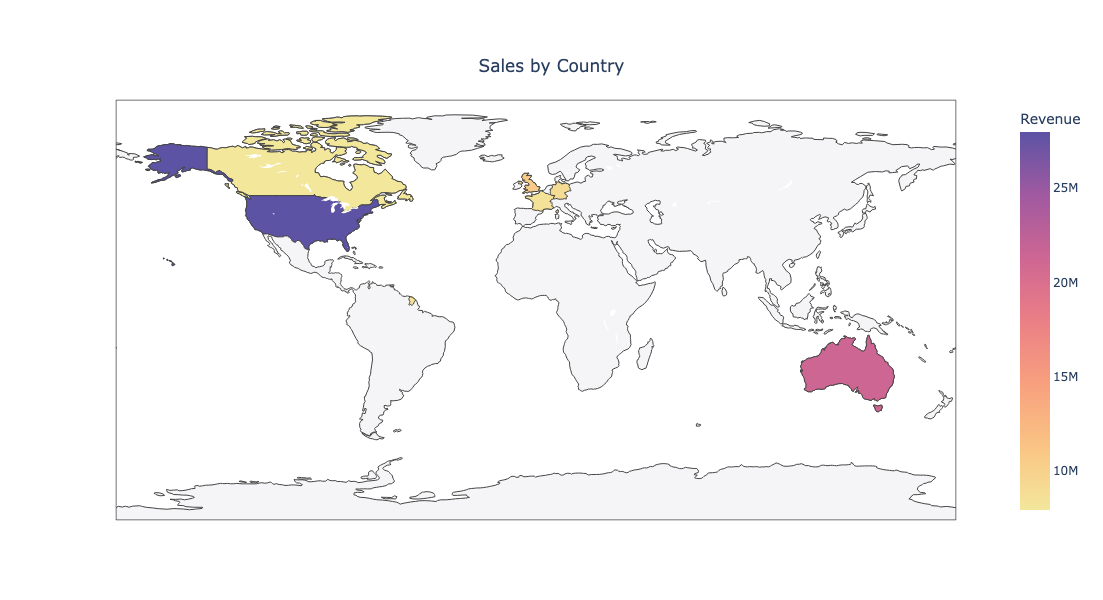

In [68]:
# Group by country and calculate total revenue
country_sales = data.groupby('Country')['Revenue'].sum().reset_index()

# Plot a map
fig = px.choropleth(
    country_sales, 
    locations="Country", 
    locationmode='country names',
    color="Revenue", 
    title="Sales by Country",
    color_continuous_scale=px.colors.sequential.Sunset # Color scale for the map
)

# Update layout to make the map larger and center the title
fig.update_layout(
    width=1000,  # Set map width
    height=600,  # Set map height
    title={
        'text': "Sales by Country",  # Title text
        'y': 0.9,  # Vertical position
        'x': 0.5,  # Horizontal position (centered)
        'xanchor': 'center',  # Horizontal alignment
        'yanchor': 'top'  # Vertical alignment
    }
)

# Update the geos layout to change the land color for areas without data
fig.update_geos(
    landcolor="#F5F5F7",  # Light gray for land without data (or other desired color)
    bgcolor="#ffffff"     # Background color (optional)
)

fig.show()


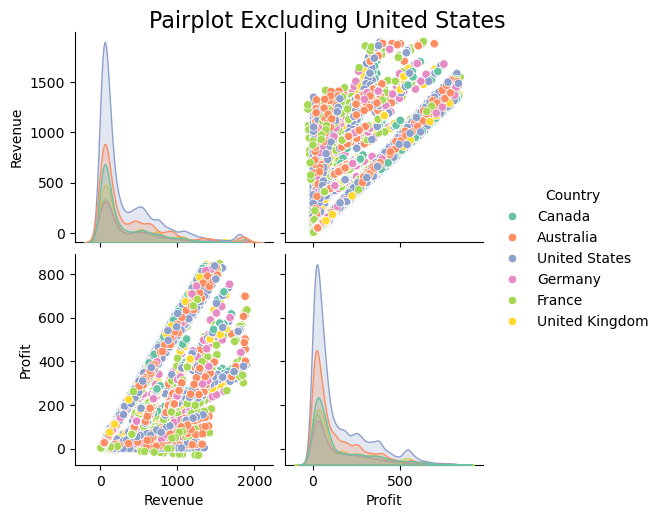

In [74]:
# Suppose we want to remove outliers in Revenue and Profit
columns_to_check = ['Revenue', 'Profit']

# Calculate IQR
Q1 = data[columns_to_check].quantile(0.25)  # First quartile
Q3 = data[columns_to_check].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_no_outliers = data[~((data[columns_to_check] < lower_bound) | (data[columns_to_check] > upper_bound)).any(axis=1)]

# Select variables for analysis
pairplot_data = data_no_outliers[['Revenue', 'Profit', 'Country']]

# Plot a pairplot, differentiated by country
sns.pairplot(pairplot_data, hue='Country', diag_kind='kde', palette='Set2')

plt.suptitle('Pairplot Excluding United States', y=1.02, fontsize=16)
plt.show()

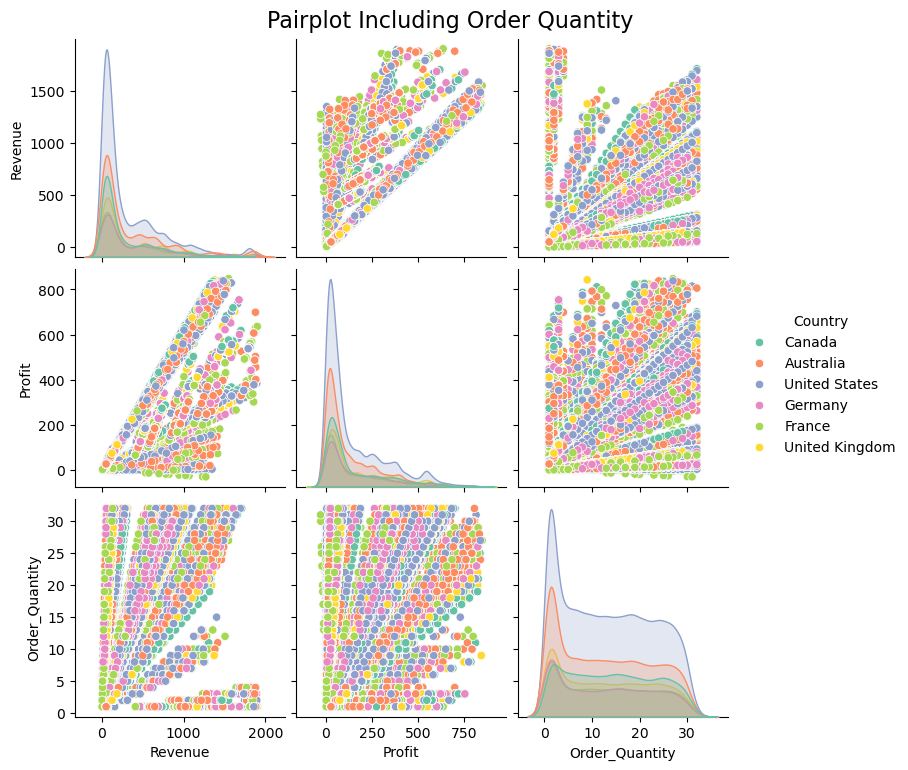

In [80]:
# Select variables for analysis
pairplot_data = data_no_outliers[['Revenue', 'Profit', 'Order_Quantity', 'Country']]

# Plot a pairplot: differentiated by country
sns.pairplot(pairplot_data, hue='Country', diag_kind='kde', palette='Set2')

plt.suptitle('Pairplot Including Order Quantity', y=1.02, fontsize=16)
plt.show()

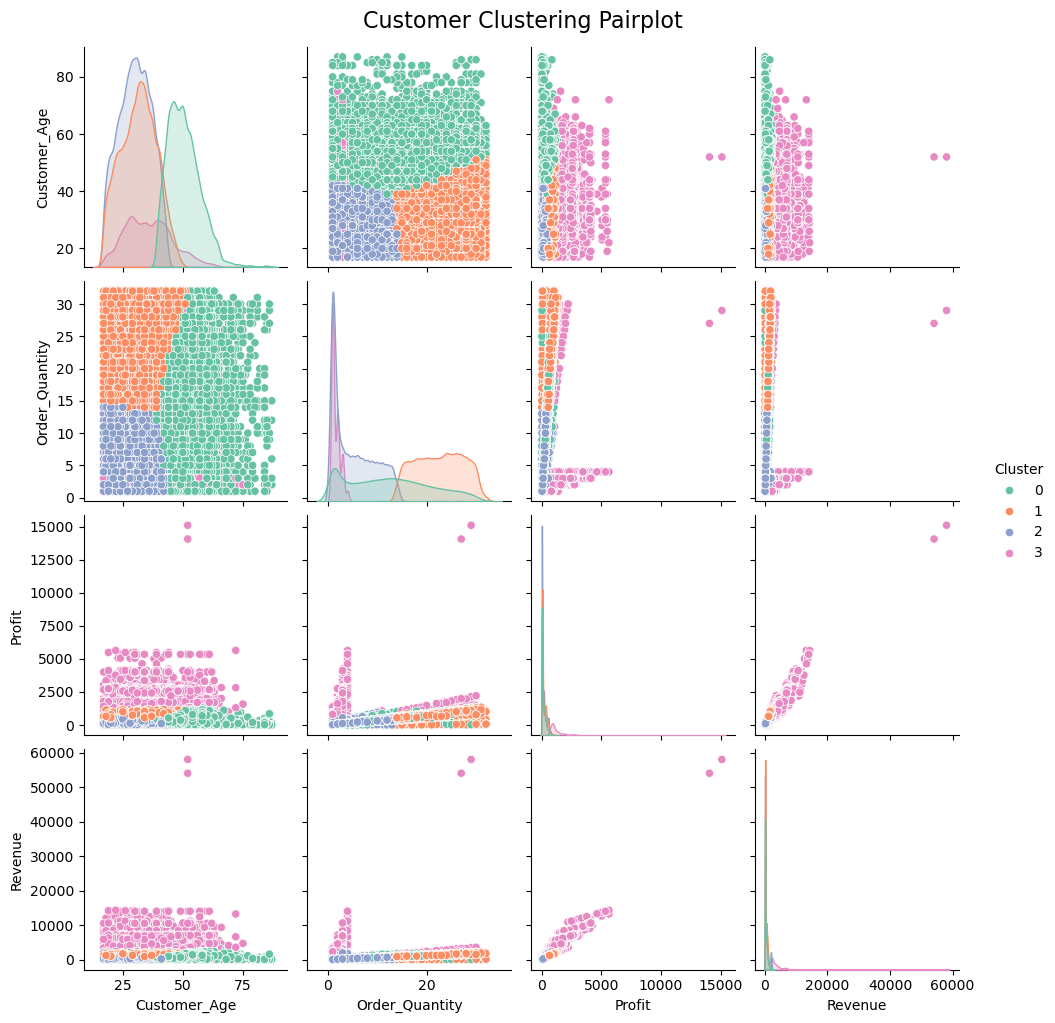

In [87]:
# 2. Select features for clustering
features = data[['Customer_Age', 'Order_Quantity', 'Profit', 'Revenue']]

# 3. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4. Apply K-Means clustering (adjust the number of clusters as needed)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# 5. Visualize clustering results using Pairplot
sns.pairplot(data, vars=['Customer_Age', 'Order_Quantity', 'Profit', 'Revenue'], hue='Cluster', palette='Set2')
plt.suptitle('Customer Clustering Pairplot', y=1.02, fontsize=16)
plt.show()
